In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("air_quality_dataset.csv")

df.head()


,lat,lon,station,timestamp,aqi,pm25,pm10,o3,no2,so2,co,temp,humidity,pressure,wind
0,33.988963,-106.921964,"South Valley, New Mexico, USA",2025-11-12 19:00:00,115,84.0,115.0,3.2,22.6,NaN,8.9,14.4,15,849.4,9.7
1,47.817143,-101.664332,"Ryder, North Dakota, USA",2025-11-12 21:00:00,25,11.0,6.0,24.8,1.0,1.5,NaN,0.4,75,936.1,10.6
2,42.567855,-74.634073,"Utica, New York, USA",2025-11-12 02:00:00,19,19.0,NaN,NaN,NaN,NaN,NaN,1.2,96,940.8,21.6
3,39.367804,-105.618524,"Chatfield Park, Colorado, USA",2025-11-12 20:00:00,54,30.0,54.0,0.9,9.2,0.6,1.9,-0.2,29,663.8,12.2
4,28.744447,-114.169421,"Yuma Supersite, Arizona, USA",2025-11-12 20:00:00,114,114.0,114.0,0.5,NaN,NaN,NaN,15.5,97,1002.6,4.8


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        250 non-null    float64
 1   lon        250 non-null    float64
 2   station    250 non-null    object 
 3   timestamp  250 non-null    object 
 4   aqi        250 non-null    int64  
 5   pm25       223 non-null    float64
 6   pm10       115 non-null    float64
 7   o3         153 non-null    float64
 8   no2        71 non-null     float64
 9   so2        52 non-null     float64
 10  co         31 non-null     float64
 11  temp       250 non-null    float64
 12  humidity   250 non-null    int64  
 13  pressure   250 non-null    float64
 14  wind       250 non-null    float64
dtypes: float64(11), int64(2), object(2)
memory usage: 29.4+ KB


In [30]:
import numpy as np

pollutants = ["pm25", "pm10", "o3", "no2", "so2", "co"]

# Replace "-" with NaN everywhere in pollutant cols
df[pollutants] = df[pollutants].replace("-", np.nan)

# Convert pollutants to numeric floats
for p in pollutants:
    df[p] = pd.to_numeric(df[p], errors="coerce")

# Ensure AQI is numeric too
df["aqi"] = pd.to_numeric(df["aqi"], errors="coerce")

df.head()


,lat,lon,station,timestamp,aqi,pm25,pm10,o3,no2,so2,co,temp,humidity,pressure,wind
0,33.988963,-106.921964,"South Valley, New Mexico, USA",2025-11-12 19:00:00,115,84.0,115.0,3.2,22.6,NaN,8.9,14.4,15,849.4,9.7
1,47.817143,-101.664332,"Ryder, North Dakota, USA",2025-11-12 21:00:00,25,11.0,6.0,24.8,1.0,1.5,NaN,0.4,75,936.1,10.6
2,42.567855,-74.634073,"Utica, New York, USA",2025-11-12 02:00:00,19,19.0,NaN,NaN,NaN,NaN,NaN,1.2,96,940.8,21.6
3,39.367804,-105.618524,"Chatfield Park, Colorado, USA",2025-11-12 20:00:00,54,30.0,54.0,0.9,9.2,0.6,1.9,-0.2,29,663.8,12.2
4,28.744447,-114.169421,"Yuma Supersite, Arizona, USA",2025-11-12 20:00:00,114,114.0,114.0,0.5,NaN,NaN,NaN,15.5,97,1002.6,4.8


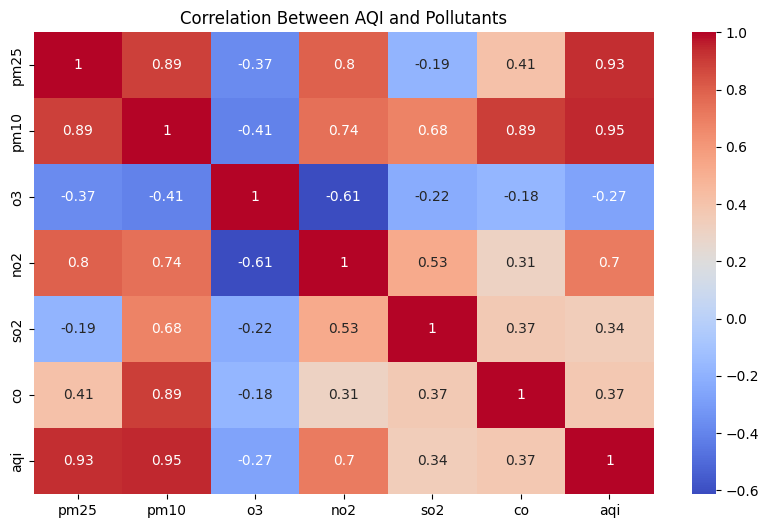

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutants + ["aqi"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between AQI and Pollutants")
plt.show()


In [32]:
df.describe(include='all')


,lat,lon,station,timestamp,aqi,pm25,pm10,o3,no2,so2,co,temp,humidity,pressure,wind
count,250.000000,250.000000,250,250,250.000000,223.000000,115.000000,153.000000,71.000000,52.000000,31.000000,250.000000,250.000000,250.000000,250.000000
unique,NaN,NaN,159,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Castle H, North Carolina, USA",2025-11-12 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,12,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.769964,-94.610921,NaN,NaN,34.096000,32.381166,27.660870,16.517554,6.987324,2.688462,2.961290,11.567200,62.612000,962.744000,15.368800
std,7.138570,17.417753,NaN,NaN,24.059472,24.206748,28.217168,9.236270,7.142227,5.861194,5.565829,7.850038,19.402455,75.504299,11.949649
min,25.121478,-123.371416,NaN,NaN,2.000000,1.000000,1.000000,0.389695,0.700000,0.100000,0.100000,-4.300000,15.000000,657.300000,0.400000
25%,30.541862,-107.874877,NaN,NaN,18.000000,14.000000,10.000000,9.600000,2.000000,0.600000,0.550000,5.425000,53.000000,935.325000,7.400000
50%,37.063793,-93.526830,NaN,NaN,27.000000,25.000000,18.000000,17.600000,3.800000,0.950000,1.200000,10.600000,62.500000,989.600000,11.850000
75%,43.078869,-80.092823,NaN,NaN,45.000000,45.000000,32.000000,24.100000,9.600000,1.925000,2.300000,18.900000,77.000000,1017.875000,19.000000


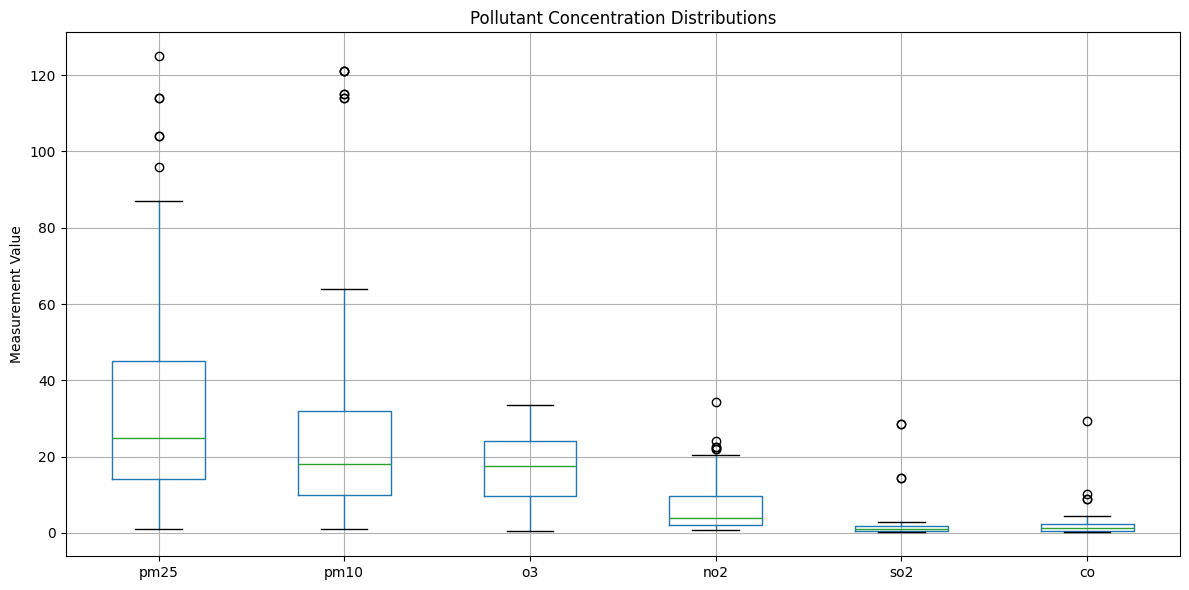

In [33]:
pollutants = ["pm25", "pm10", "o3", "no2", "so2", "co"]

plt.figure(figsize=(12,6))
df[pollutants].boxplot()
plt.title("Pollutant Concentration Distributions")
plt.ylabel("Measurement Value")
plt.tight_layout()
plt.show()


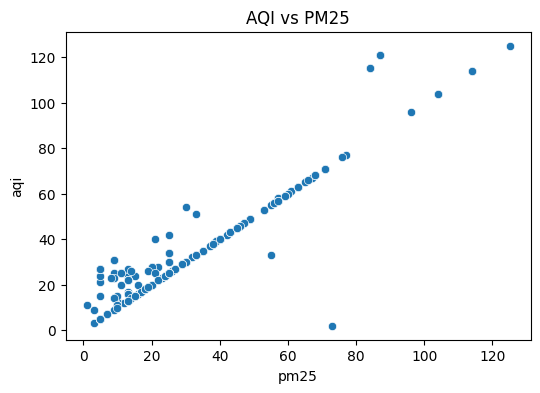

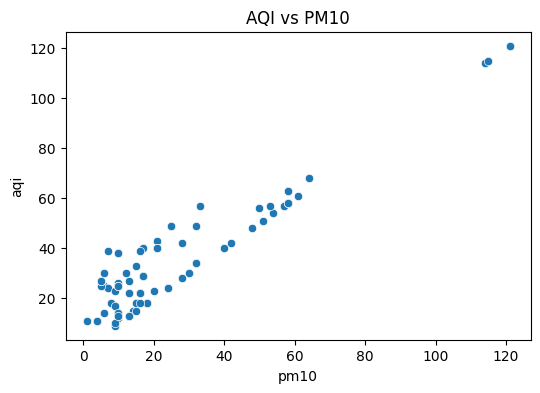

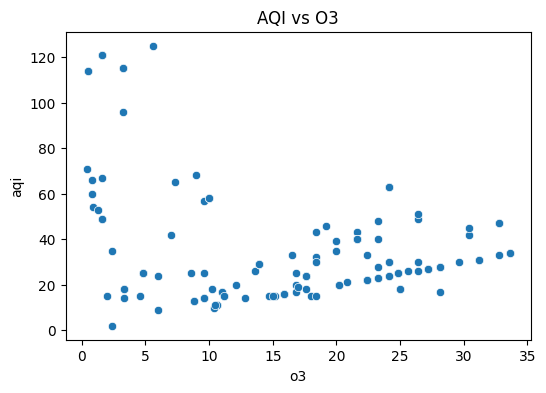

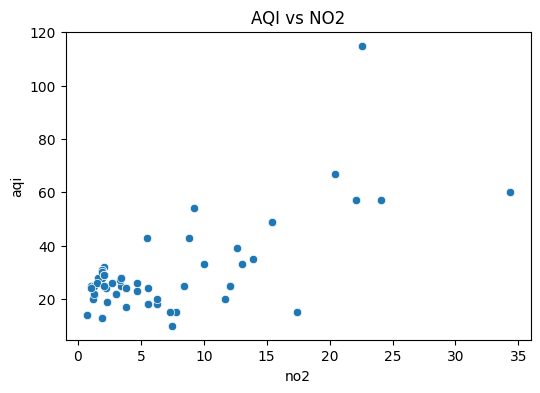

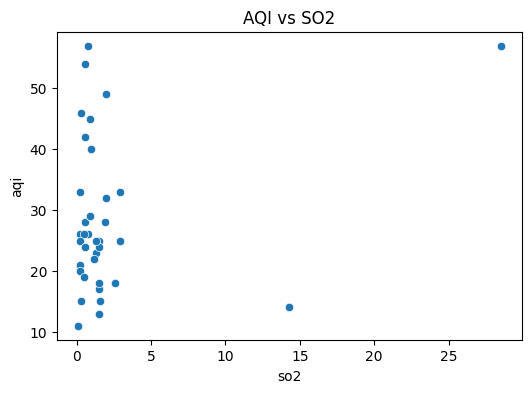

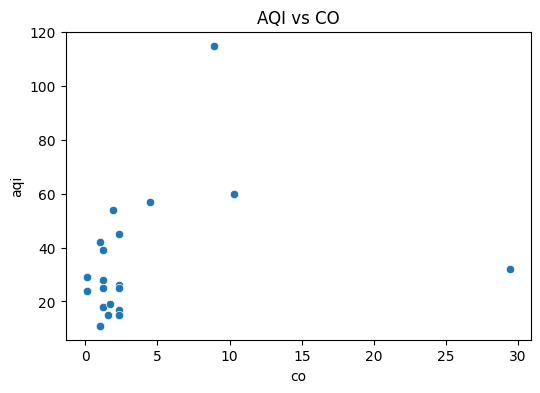

In [36]:
for p in pollutants:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=p, y="aqi")
    plt.title(f"AQI vs {p.upper()}")
    plt.show()


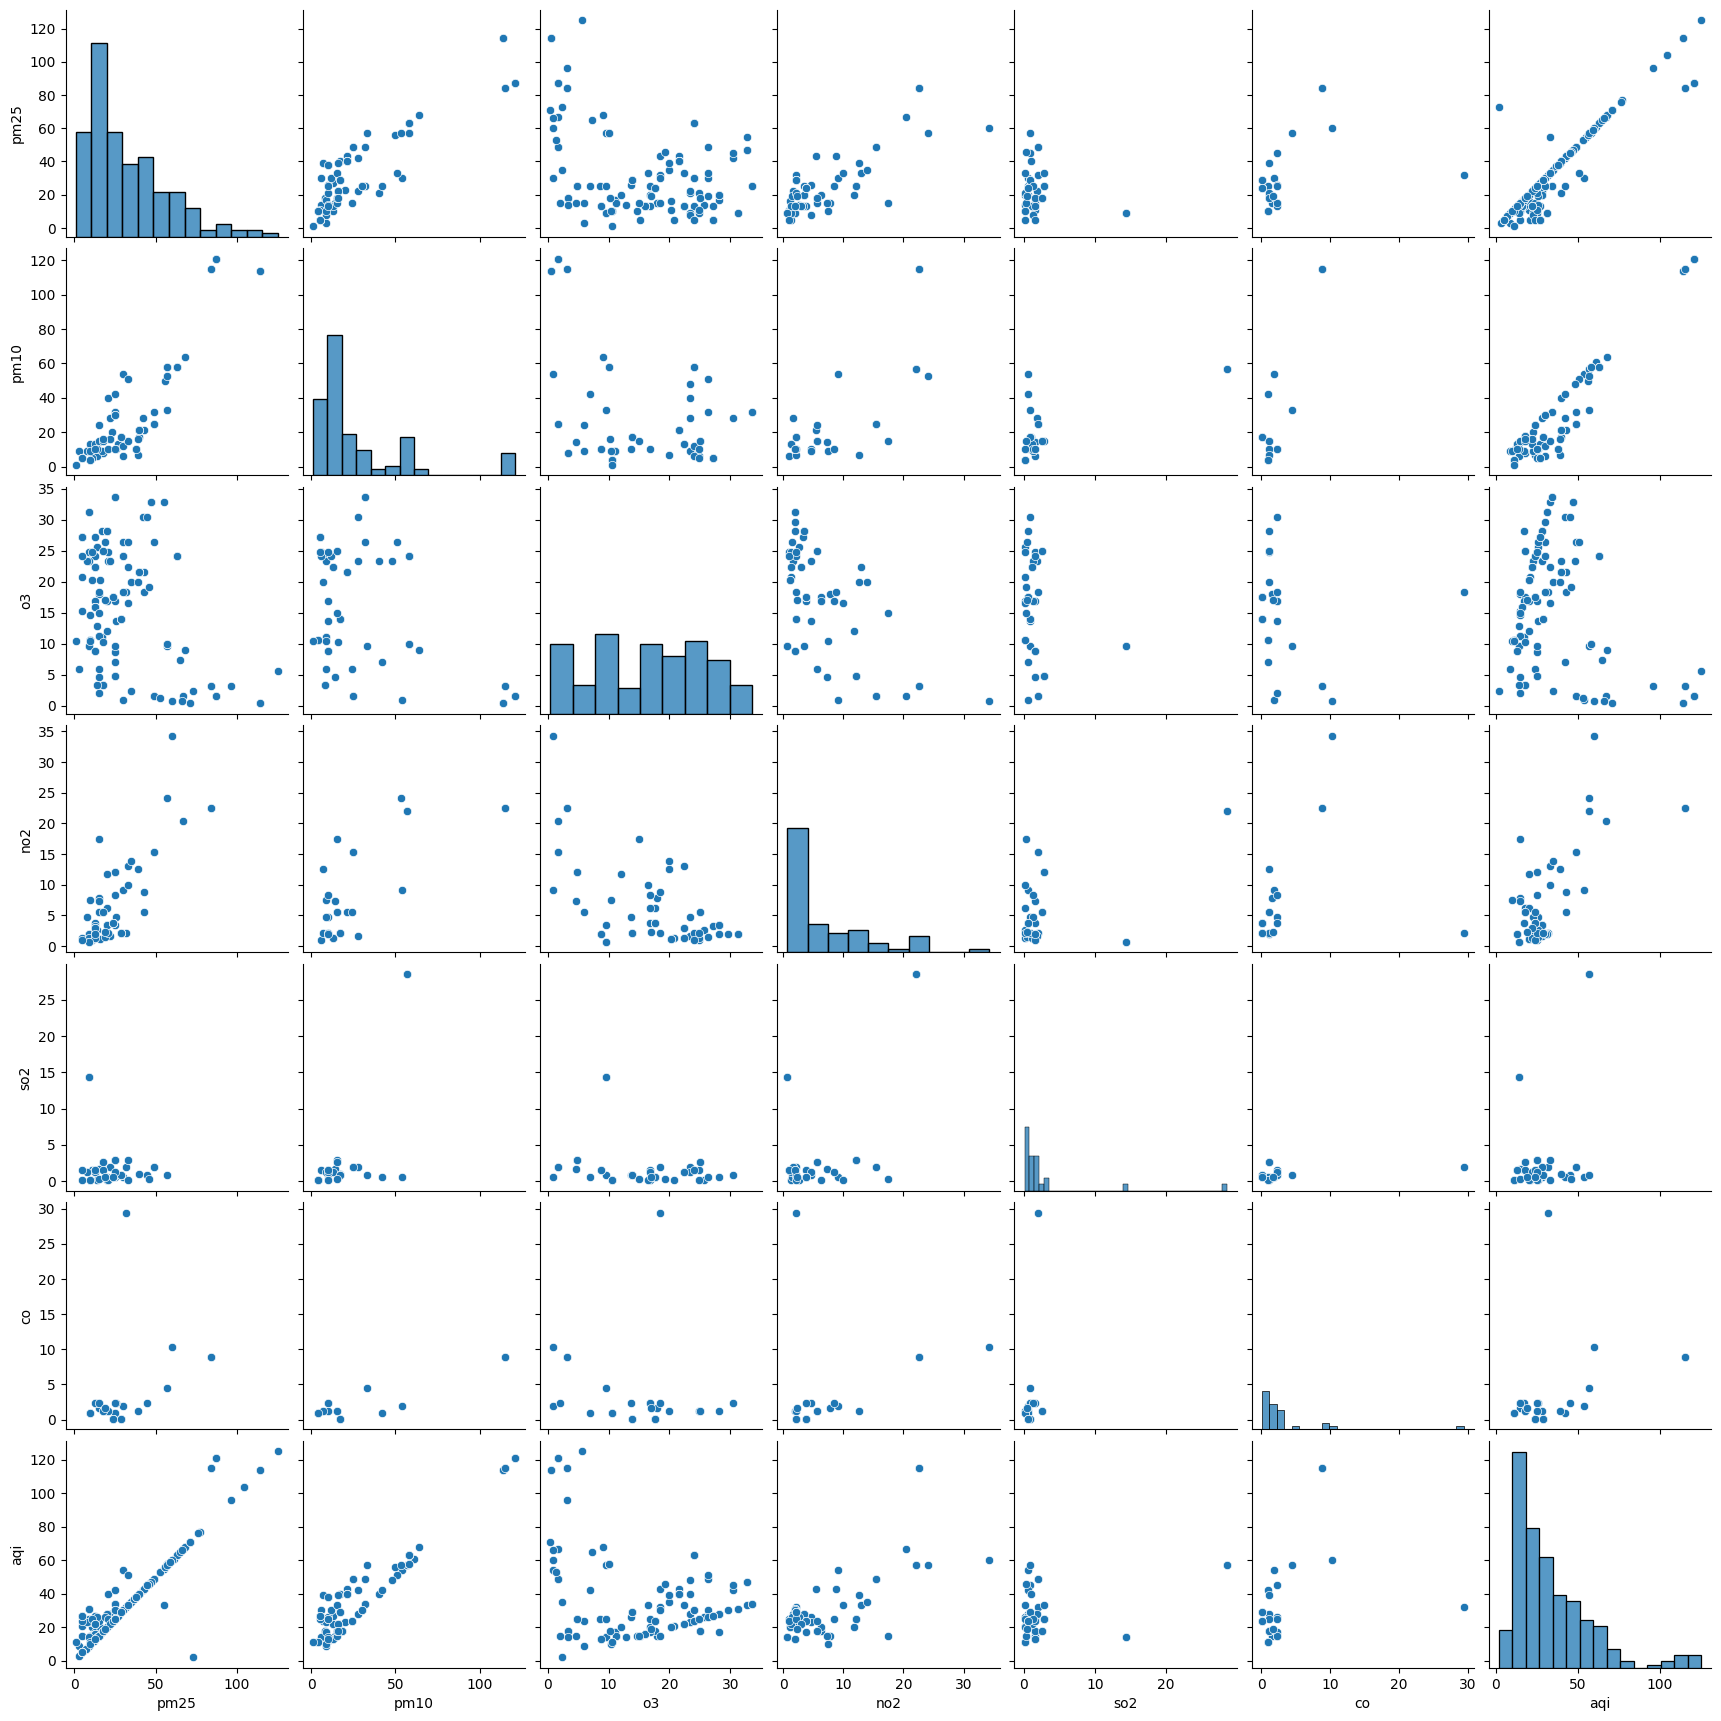

In [37]:
sns.pairplot(df[pollutants + ["aqi"]])
plt.show()


In [38]:
df.to_csv("air_quality_dataset_cleaned.csv", index=False)


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


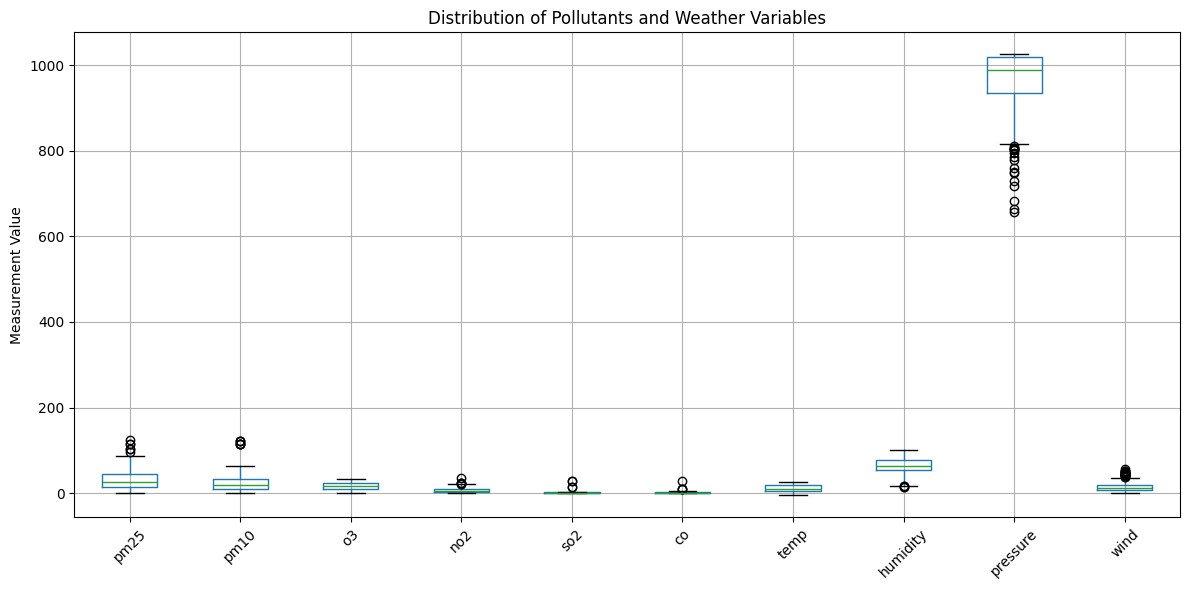

In [40]:
plt.figure(figsize=(12,6))

columns_to_plot = [
    "pm25", "pm10", "o3", "no2", "so2", "co",
    "temp", "humidity", "pressure", "wind"
]

df[columns_to_plot].boxplot()
plt.title("Distribution of Pollutants and Weather Variables")
plt.ylabel("Measurement Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


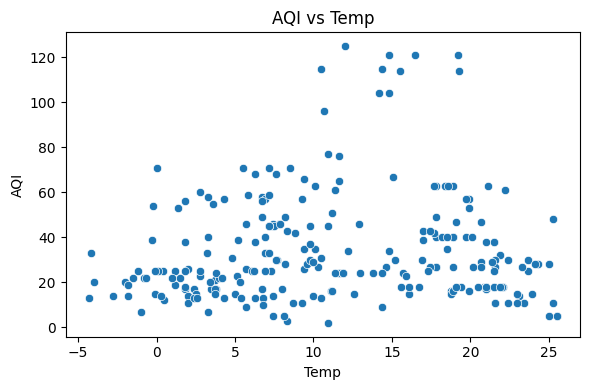

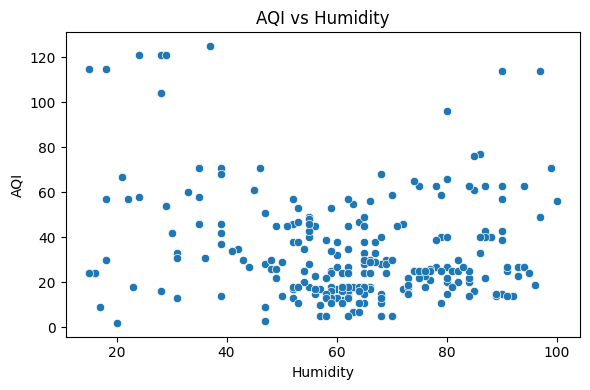

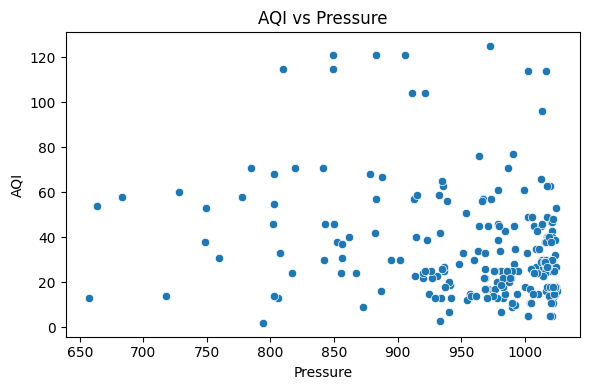

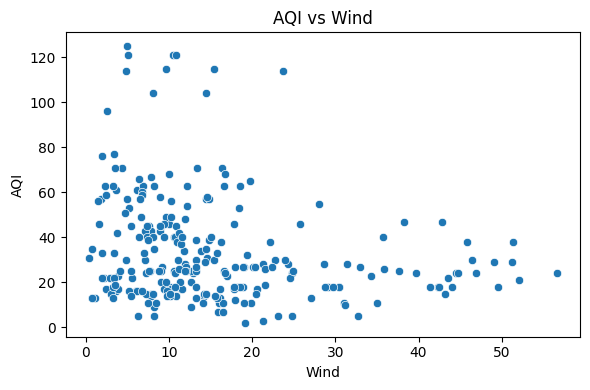

In [41]:
weather_vars = ["temp", "humidity", "pressure", "wind"]

for var in weather_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=var, y="aqi")
    plt.title(f"AQI vs {var.capitalize()}")
    plt.xlabel(var.capitalize())
    plt.ylabel("AQI")
    plt.tight_layout()
    plt.show()


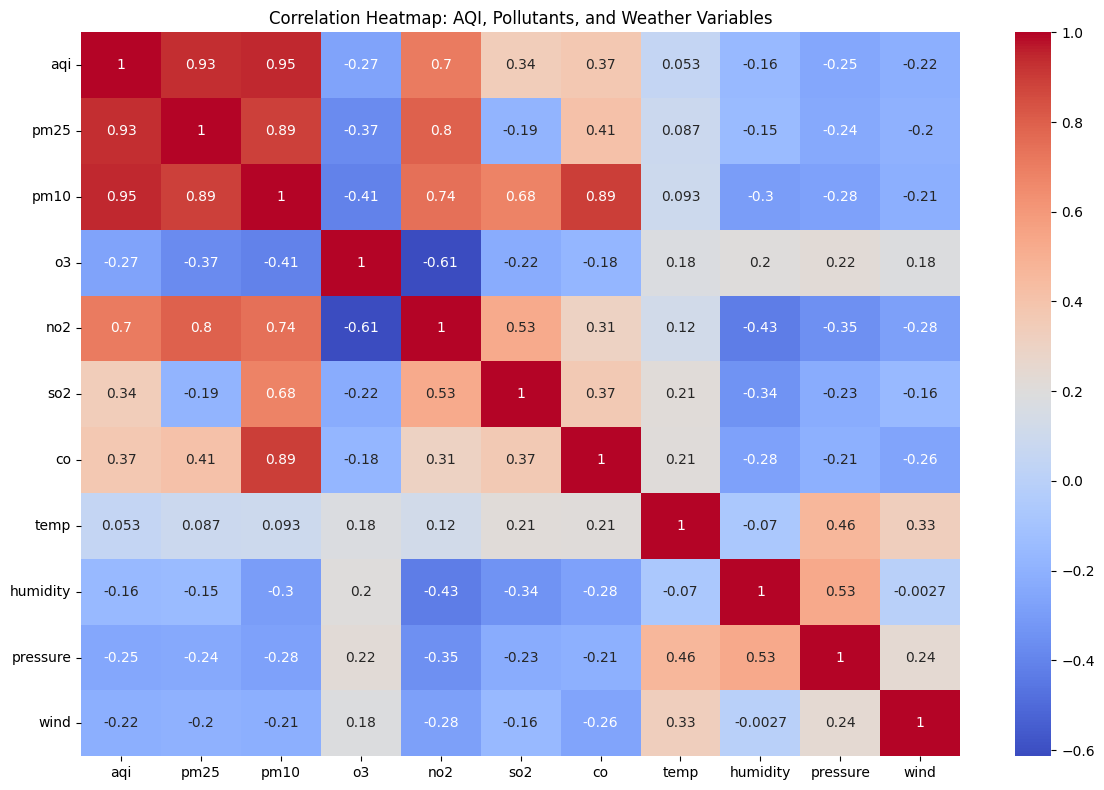

In [42]:
for col in corr_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr_cols = [
    "aqi",
    "pm25", "pm10", "o3", "no2", "so2", "co",
    "temp", "humidity", "pressure", "wind"
]

plt.figure(figsize=(12,8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: AQI, Pollutants, and Weather Variables")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("air_quality_dataset.csv")


pollutants = ["pm25", "pm10", "o3", "no2", "so2", "co"]

df[pollutants] = df[pollutants].replace("-", np.nan)

for p in pollutants:
    df[p] = pd.to_numeric(df[p], errors="coerce")

# Ensure AQI and weather vars are numeric too
num_cols = ["aqi", "temp", "humidity", "pressure", "wind"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")


print(df.head())
print(df.info())


         lat         lon                        station            timestamp  \
0  33.988963 -106.921964  South Valley, New Mexico, USA  2025-11-12 19:00:00   
1  47.817143 -101.664332       Ryder, North Dakota, USA  2025-11-12 21:00:00   
2  42.567855  -74.634073           Utica, New York, USA  2025-11-12 02:00:00   
3  39.367804 -105.618524  Chatfield Park, Colorado, USA  2025-11-12 20:00:00   
4  28.744447 -114.169421   Yuma Supersite, Arizona, USA  2025-11-12 20:00:00   

   aqi   pm25   pm10    o3   no2  so2   co  temp  humidity  pressure  wind  
0  115   84.0  115.0   3.2  22.6  NaN  8.9  14.4        15     849.4   9.7  
1   25   11.0    6.0  24.8   1.0  1.5  NaN   0.4        75     936.1  10.6  
2   19   19.0    NaN   NaN   NaN  NaN  NaN   1.2        96     940.8  21.6  
3   54   30.0   54.0   0.9   9.2  0.6  1.9  -0.2        29     663.8  12.2  
4  114  114.0  114.0   0.5   NaN  NaN  NaN  15.5        97    1002.6   4.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 ent

In [46]:
df.to_csv("clean_air_quality_dataset.csv", index=False)


In [ ]:
import os
os.makedirs("plots", exist_ok=True)
